<a href="https://colab.research.google.com/github/deepti-9/Mpox_AI-ML/blob/main/mpox_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
df = pd.read_csv("/content/monkey pox prediction 1.csv")
df.head()


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe().T


,count,unique,top,freq
Patient_ID,25000,25000,P0,1
Systemic Illness,18784,3,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


In [ ]:
# column names

df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [ ]:
#  give the value count in the row systemic illness

df['Systemic Illness'].value_counts()


,count
Systemic Illness,
Fever,6382
Swollen Lymph Nodes,6252
Muscle Aches and Pain,6150


In [ ]:
tab = pd.crosstab(df['Systemic Illness'], columns=df.MonkeyPox)
print(tab)


MonkeyPox              Negative  Positive
Systemic Illness                         
Fever                      1602      4780
Muscle Aches and Pain      2926      3224
Swollen Lymph Nodes        1671      4581


In [ ]:
# change the coloumn name of systemic illness to Systemic_Illness

df.rename(columns = {'Systemic Illness':'Systemic_Illness'}, inplace = True)

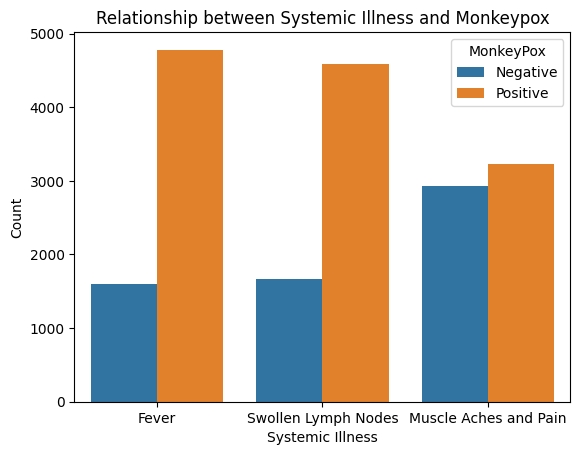

In [ ]:
sns.countplot(x='Systemic_Illness', hue='MonkeyPox', data=df)
plt.title('Relationship between Systemic Illness and Monkeypox')
plt.xlabel('Systemic Illness')
plt.ylabel('Count')
plt.show()


In [ ]:
category_columns = [column for column in df.columns if (df[column].dtype != 'float64' or df[column].dtype != 'int64')]
print(category_columns)

['Patient_ID', 'Systemic_Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']


In [ ]:
encoder = LabelEncoder()
for column in category_columns:
    df[column] = encoder.fit_transform(df[column])
df
#Fever-0,Swollen nymph node-2, Nan-3,Muscle Aches and Pain-4, True - 1 , False - 0

,Patient_ID,Systemic_Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,3,0,1,1,1,0,1,0,0,0
1,1,0,1,0,1,1,0,0,1,0,1
2,11112,0,0,1,1,0,0,0,1,0,1
3,17223,3,1,0,0,0,1,1,1,0,1
4,18334,2,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,16663,3,1,1,0,1,1,0,0,1,1
24996,16664,0,0,1,1,0,1,1,1,1,1
24997,16665,3,1,1,0,0,1,1,0,0,1
24998,16666,2,0,1,0,1,1,1,0,0,0


In [ ]:
#  give the value count of the row monkey pox with the index name being positive for 1 and negative for 0 values
df['MonkeyPox'].value_counts().rename(index={1: 'Positive', 0: 'Negative'})

,count
MonkeyPox,
Positive,15909
Negative,9091


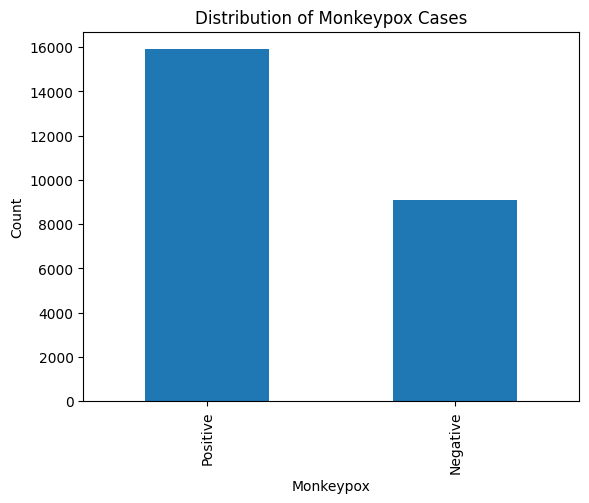

In [ ]:
#  make a graph using the value count of postive and negative in the Monkeypox column of the dataset
df['MonkeyPox'].value_counts().rename(index={1: 'Positive', 0: 'Negative'}).plot(kind='bar')
plt.title('Distribution of Monkeypox Cases')
plt.xlabel('Monkeypox')
plt.ylabel('Count')
plt.show()

In [ ]:
df= df.drop(columns=["Patient_ID"], axis=1)

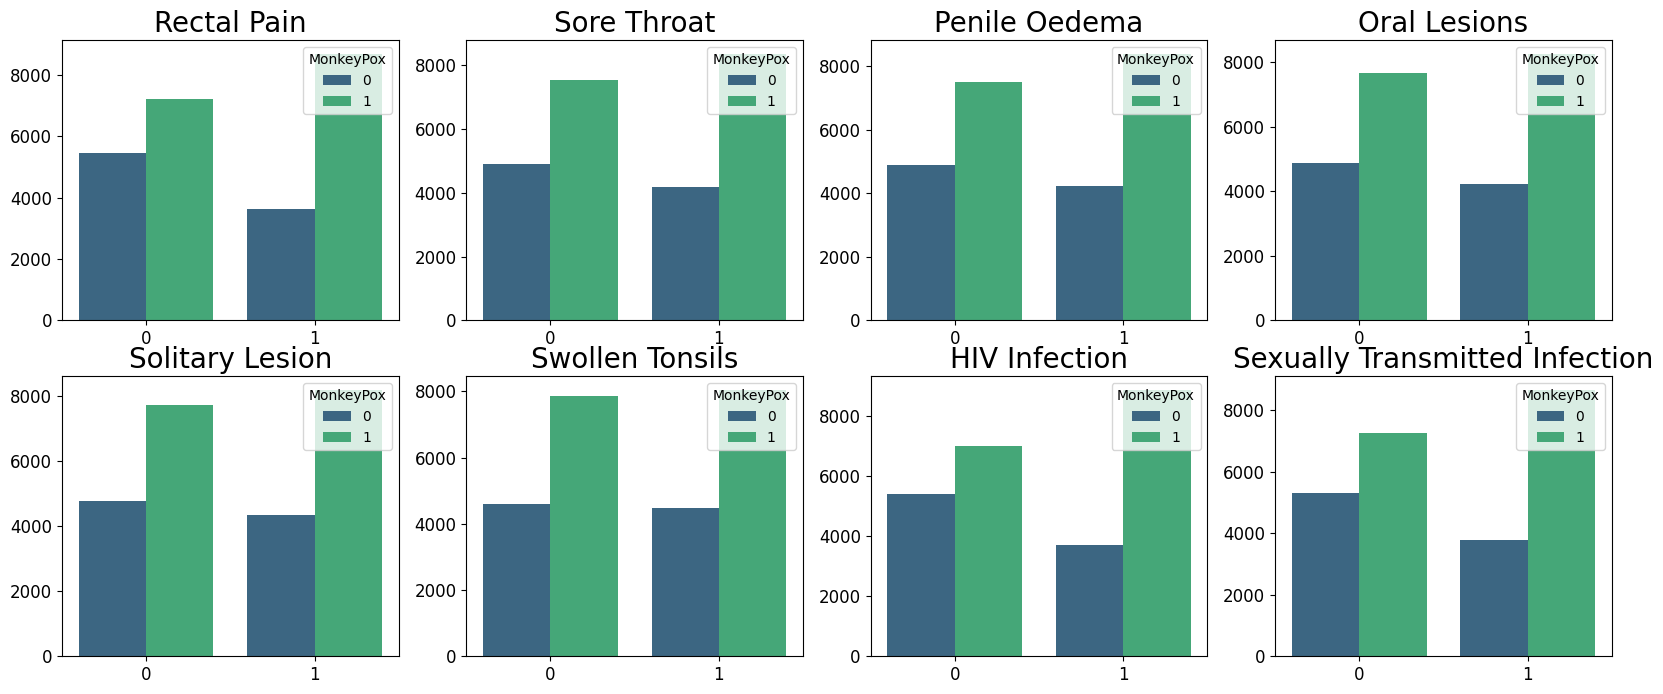

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
palette = 'viridis'
ax = ax.flatten()
for idx, feature in enumerate(df.columns.drop(['MonkeyPox', 'Systemic_Illness'])):
    sns.countplot(x=feature, hue='MonkeyPox', data=df, palette=palette, ax=ax[idx])
    ax[idx].set_title(feature, fontsize=20)
    ax[idx].set(ylabel=None, xlabel=None)
    ax[idx].tick_params(axis='both', labelsize=12)


In [ ]:
numeric_columns = [column for column in df.columns if df[column].dtype == 'int64']
print(numeric_columns)

['Systemic_Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']


# **Corellation Analysis**

<Axes: >

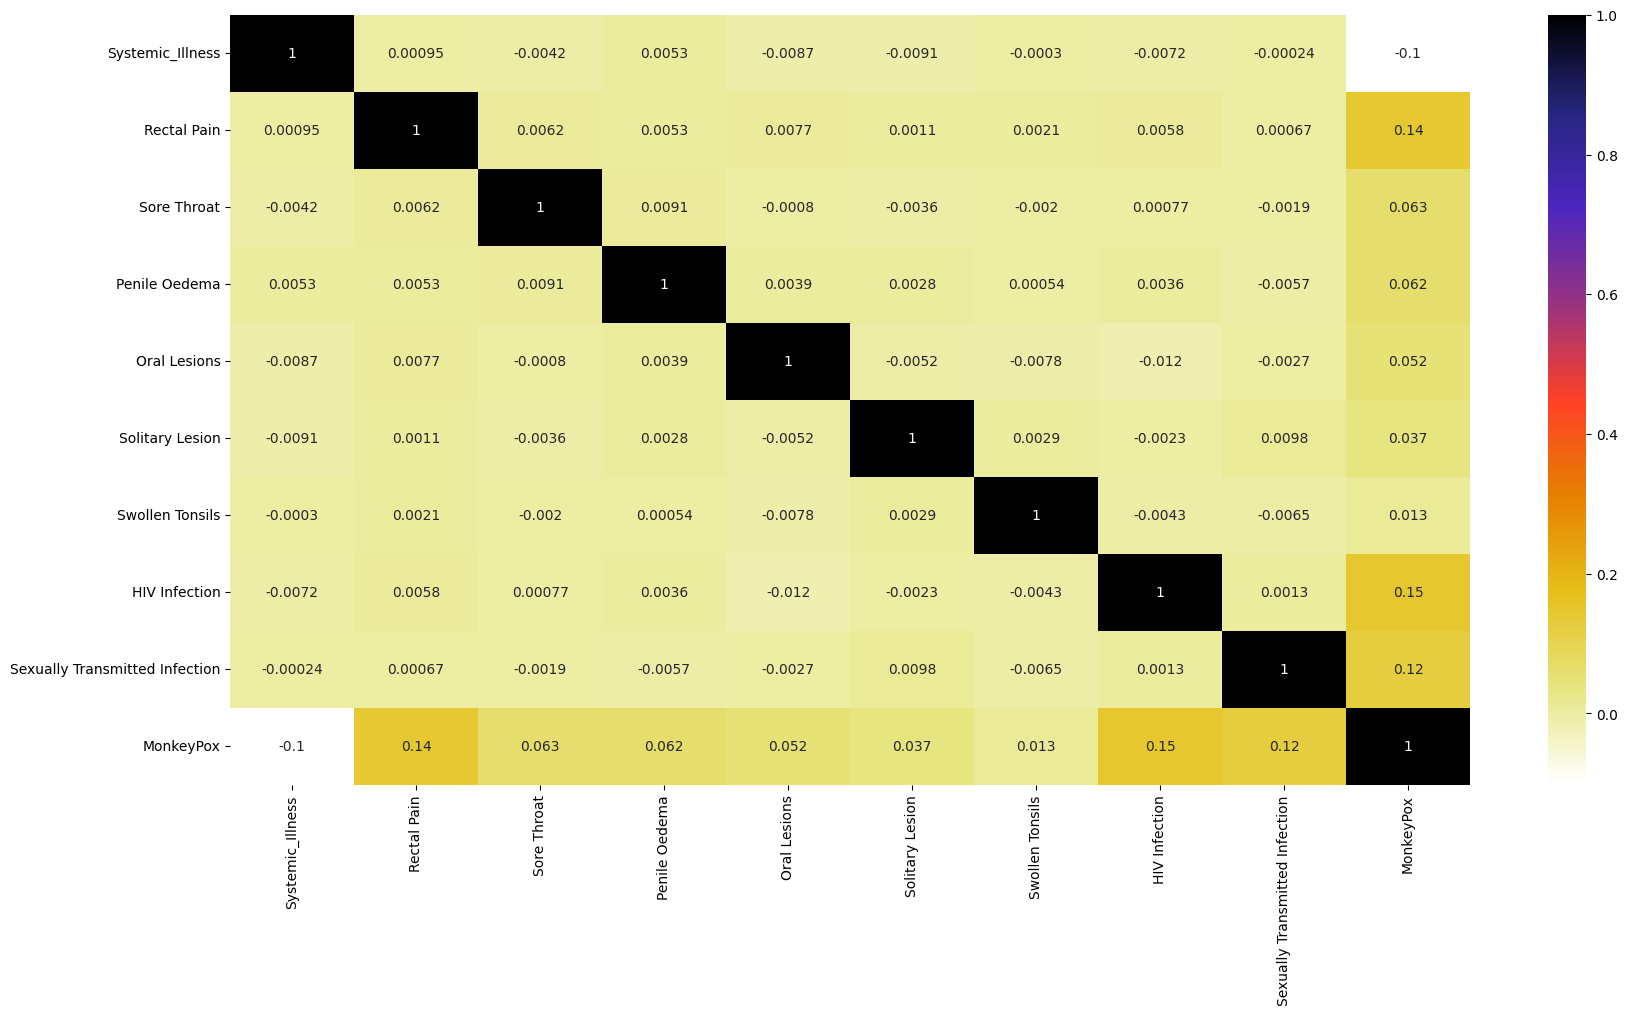

In [ ]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,cmap=plt.cm.CMRmap_r, annot=True, )

In [ ]:
df.corr()


,Systemic_Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Systemic_Illness,1.000000,0.000947,-0.004249,0.005342,-0.008710,-0.009080,-0.000302,-0.007157,-0.000245,-0.102280
Rectal Pain,0.000947,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666,0.140727
Sore Throat,-0.004249,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901,0.063385
Penile Oedema,0.005342,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722,0.061905
Oral Lesions,-0.008710,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725,0.051955
Solitary Lesion,-0.009080,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849,0.037471
Swollen Tonsils,-0.000302,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469,0.013221
HIV Infection,-0.007157,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309,0.146192
Sexually Transmitted Infection,-0.000245,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000,0.123376
MonkeyPox,-0.102280,0.140727,0.063385,0.061905,0.051955,0.037471,0.013221,0.146192,0.123376,1.000000


In [ ]:
x_train=df.drop(columns=["MonkeyPox"])
y_train=df["MonkeyPox"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)


In [ ]:
def scores(actual, predicted):
    score = f1_score(actual, predicted)
    recall = recall_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    print('precision: ', precision * 100)
    print('accuracy ：', accuracy * 100)
    print('recall：', recall * 100)
    print("F1: ", score * 100)

# **Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
scores(y_test, y_pred)


precision:  68.82581271227559
accuracy ： 66.82000000000001
recall： 88.35253815010901
F1:  77.3762443747443


In [ ]:
def cm():
  cm = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  plt.show()


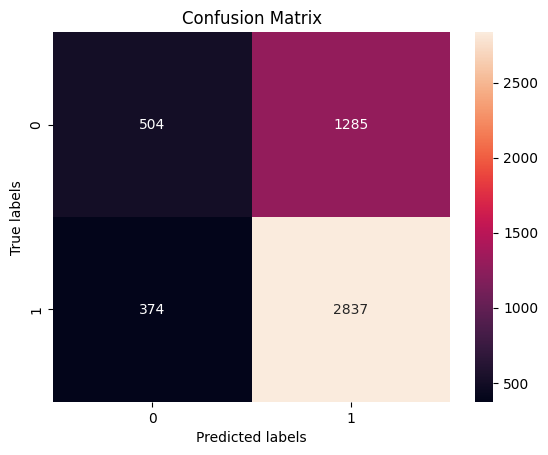

In [ ]:
cm()

# **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(max_depth=100, min_samples_leaf=100)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
scores(y_test, y_pred)


precision:  69.80295566502464
accuracy ： 67.94
recall： 88.25910931174089
F1:  77.95351395956538


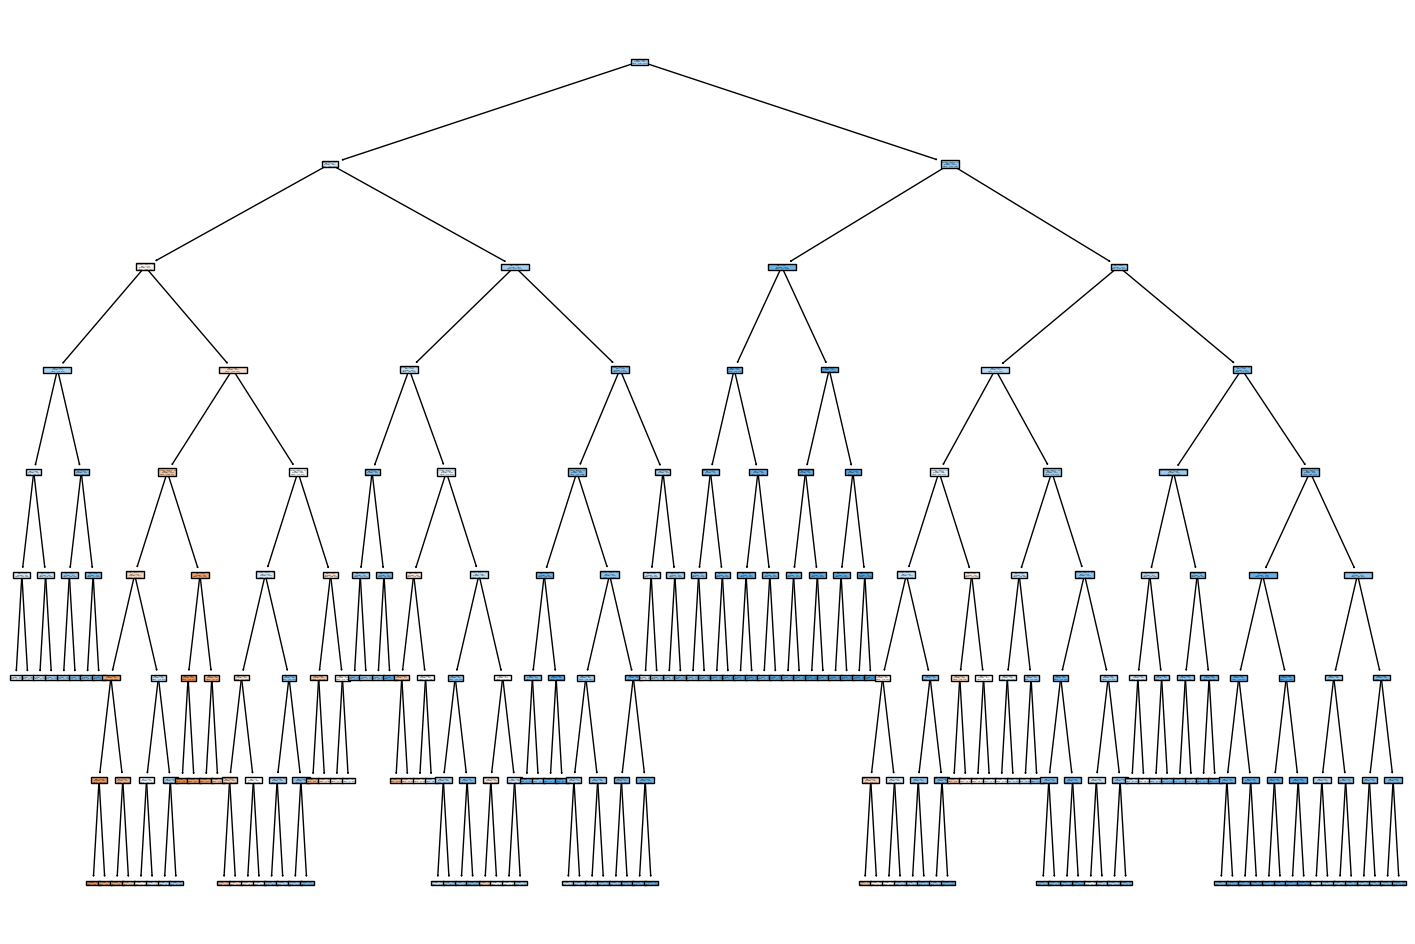

In [ ]:
feature_names = list(x_train.columns.values)
plt.figure(figsize=(18, 12))
_ = tree.plot_tree(dt, filled=True, feature_names=feature_names)

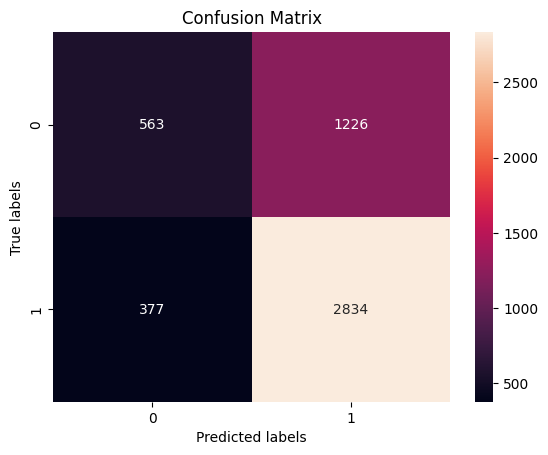

In [ ]:
cm()

# **Random Forest**

Random Forest ：
precision:  69.58382877526755
accuracy ： 68.72
recall： 91.12426035502959
F1:  78.91046386192018


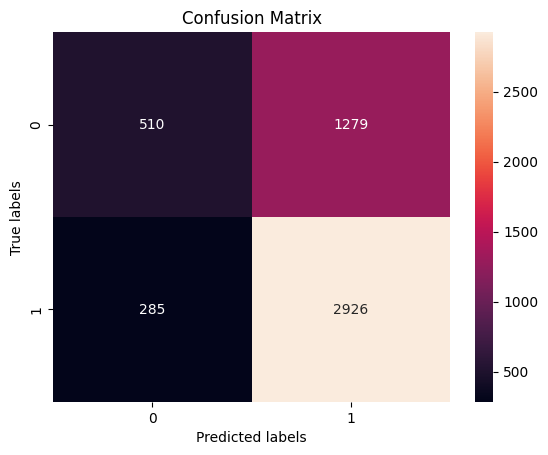

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=50, max_features=3, bootstrap=True)
history = rf.fit(x_train, y_train, )
y_pred = rf.predict(x_test)
print('Random Forest ：')
scores(y_test, y_pred)

cm()

KNN ：
precision:  70.38043478260869
accuracy ： 65.78
recall： 80.6602304578013
F1:  75.17051226237122


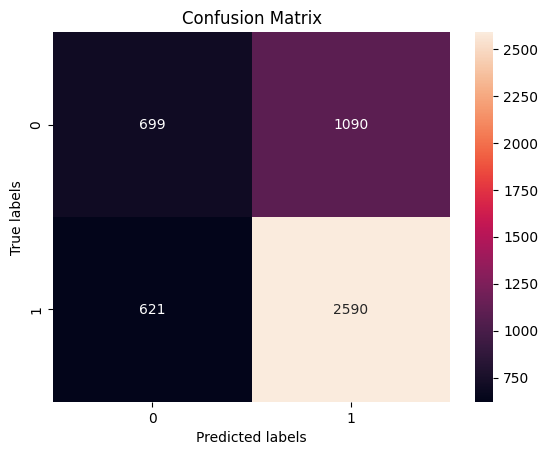

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(x_train, y_train)
    y_pred = clf_knn.predict(x_test)
print('KNN ：')
scores(y_test, y_pred)
cm()